In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
students = pd.read_csv('Student_Performance.csv')

In [5]:
mapping = {'Yes': 1, 'No': 0}
students['New Extracurricular Activities'] = students['Extracurricular Activities'].map(mapping)
for column in students.columns:
    if students[column].dtype == 'int64':
        students[column] = students[column].astype(float)
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  float64
 1   Previous Scores                   10000 non-null  float64
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  float64
 4   Sample Question Papers Practiced  10000 non-null  float64
 5   Performance Index                 10000 non-null  float64
 6   New Extracurricular Activities    10000 non-null  float64
dtypes: float64(6), object(1)
memory usage: 547.0+ KB


In [6]:
float_columns = students.select_dtypes(include=['float64'])

In [7]:
Y = float_columns['Performance Index']
X = float_columns.drop('Performance Index', axis=1)

Till here we just loaded the data converted all dat fields into float 64.
The only thing i have doubt is the Extra circullar activity? its just yes or no did i do right to convert it to 1 and 0 ?

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [12]:
poly_features = polynomial_converter.fit_transform(X)
poly_features.shape

(10000, 20)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, Y, test_size=0.3, random_state=101)

In [15]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [20]:
predictions = lm.predict(X_test)
resuidal = y_test - predictions

In [21]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.6098167363907487
MSE: 4.086222549405904
RMSE: 2.0214407113259356


Now, will see does fitting a polynominal Regression model works or no?

In [22]:
train_rmse_error = []
test_rmse_error = []

for i in range(1,10):
    polynomial_converter = PolynomialFeatures(degree=i, include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, Y, test_size=0.3, random_state=101)
    lm.fit(X_train,y_train)

    train_predictions = lm.predict(X_train)
    test_predictions = lm.predict(X_test)

    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, test_predictions))

    train_rmse_error.append(train_rmse)
    test_rmse_error.append(test_rmse)

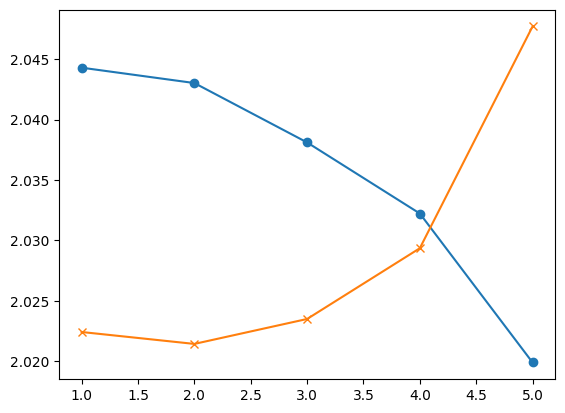

In [26]:
plt.plot(range(1, 6), train_rmse_error[:5], marker='o', label='Train RMSE')
plt.plot(range(1, 6), test_rmse_error[:5], marker='x', label='Test RMSE')

I guess for conclusion for this specific data set the degree of 1 was best since degree two the RMSE of the test pridiction stats to increase.
On zooming in we see second degree performs a bit better just before it shoots up. But since its just before shooting up its risky and feels like it will be over fitted.